In [1]:
#@title Importaciones
import kagglehub, pandas as pd, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
#anime_with_emotions_and_name = pd.read_csv('./Dataset limpio/anime_with_emotion_and_name.csv') #Si se esta desde el repo usar este
anime_with_emotions_and_name = pd.read_csv('./anime_with_emotion_and_name.csv') # usar este si es desde el colab y sube el archivo aqui
anime_with_emotions_and_name

anime_id      fear   sadness   neutral       joy     anger  surprise  \
0        16498  0.930178  0.002300  0.006931  0.000917  0.027780  0.002147   
1         1535  0.085855  0.015855  0.034499  0.002459  0.053454  0.001762   
2         5114  0.752298  0.029428  0.014101  0.001377  0.105504  0.003924   
3        30276  0.014385  0.011197  0.043884  0.004364  0.010014  0.911681   
4        11757  0.104916  0.042347  0.239856  0.006279  0.087860  0.008804   
...        ...       ...       ...       ...       ...       ...       ...   
7579     39331  0.003019  0.002221  0.928283  0.031547  0.010396  0.018052   
7580     40474  0.005328  0.004118  0.861680  0.033735  0.004688  0.016691   
7581     40361  0.000982  0.008691  0.822527  0.086056  0.003946  0.073903   
7582     39704  0.941348  0.002037  0.003745  0.005805  0.018552  0.007465   
7583     50110  0.006408  0.002141  0.010406  0.006545  0.004720  0.968884   

       disgust                             title  popularity_rank  
0     0.029748                Shingeki no Kyojin                1  
1     0.806115                        Death Note                2  
2     0.093368  Fullmetal Alchemist: Brotherhood                3  
3     0.004475                     One Punch Man                4  
4     0.509938                  Sword Art Online                5  
...        ...                               ...              ...  
7579  0.006482                            Zounds            15837  
7580  0.073760                   Googuri Googuri            16029  
7581  0.003895        Shiro no Kanga"roo" no Uta            16179  
7582  0.021048                    Shiroi Unabara            16308  
7583  0.000897                       Kata no Ato            16371  

[7584 rows x 10 columns]

In [5]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(anime_with_emotions_and_name.iloc[:, 1:8])

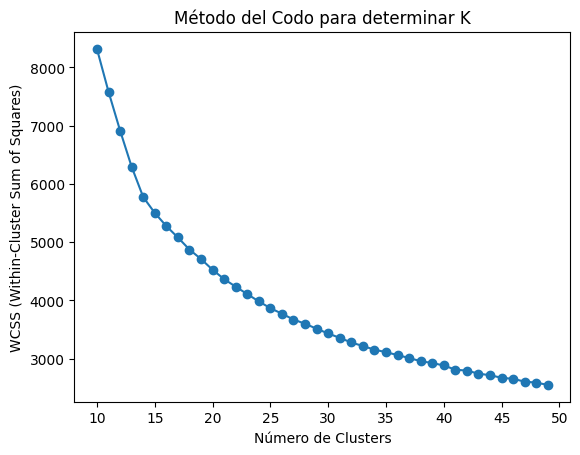

In [ ]:
wcss = []
for k in range(10, 50):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(10, 50), wcss, marker='o')
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Método del Codo para determinar K")
plt.show()

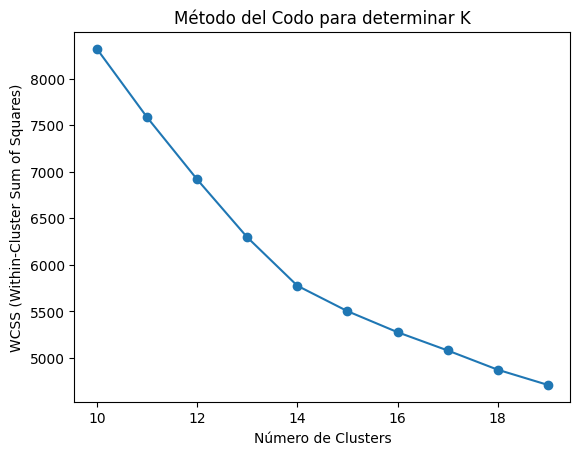

In [ ]:
wcss = []
for k in range(10, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(10, 20), wcss, marker='o')
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Método del Codo para determinar K")
plt.show()

Se encontró entonces que el mínimo de codo óptimo es de 14 con lo cual pasaremos a trabajar con 14 clusters.

In [14]:
kmeans = KMeans(n_clusters=14, random_state=42, n_init=10)

In [15]:

anime_with_emotions_and_name["Cluster"] = kmeans.fit_predict(X_scaled)

print(anime_with_emotions_and_name[["anime_id", "Cluster"]])
# Visualizión clusters (Usamos PCA para reducir dimensiones a 2D)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
anime_with_emotions_and_name

      anime_id  Cluster
0        16498        1
1         1535        6
2         5114        1
3        30276        5
4        11757       11
...        ...      ...
7579     39331        0
7580     40474        0
7581     40361        0
7582     39704        1
7583     50110        5

[7584 rows x 2 columns]


anime_id      fear   sadness   neutral       joy     anger  surprise  \
0        16498  0.930178  0.002300  0.006931  0.000917  0.027780  0.002147   
1         1535  0.085855  0.015855  0.034499  0.002459  0.053454  0.001762   
2         5114  0.752298  0.029428  0.014101  0.001377  0.105504  0.003924   
3        30276  0.014385  0.011197  0.043884  0.004364  0.010014  0.911681   
4        11757  0.104916  0.042347  0.239856  0.006279  0.087860  0.008804   
...        ...       ...       ...       ...       ...       ...       ...   
7579     39331  0.003019  0.002221  0.928283  0.031547  0.010396  0.018052   
7580     40474  0.005328  0.004118  0.861680  0.033735  0.004688  0.016691   
7581     40361  0.000982  0.008691  0.822527  0.086056  0.003946  0.073903   
7582     39704  0.941348  0.002037  0.003745  0.005805  0.018552  0.007465   
7583     50110  0.006408  0.002141  0.010406  0.006545  0.004720  0.968884   

       disgust                             title  popularity_rank  Cluster  
0     0.029748                Shingeki no Kyojin                1        1  
1     0.806115                        Death Note                2        6  
2     0.093368  Fullmetal Alchemist: Brotherhood                3        1  
3     0.004475                     One Punch Man                4        5  
4     0.509938                  Sword Art Online                5       11  
...        ...                               ...              ...      ...  
7579  0.006482                            Zounds            15837        0  
7580  0.073760                   Googuri Googuri            16029        0  
7581  0.003895        Shiro no Kanga"roo" no Uta            16179        0  
7582  0.021048                    Shiroi Unabara            16308        1  
7583  0.000897                       Kata no Ato            16371        5  

[7584 rows x 11 columns]

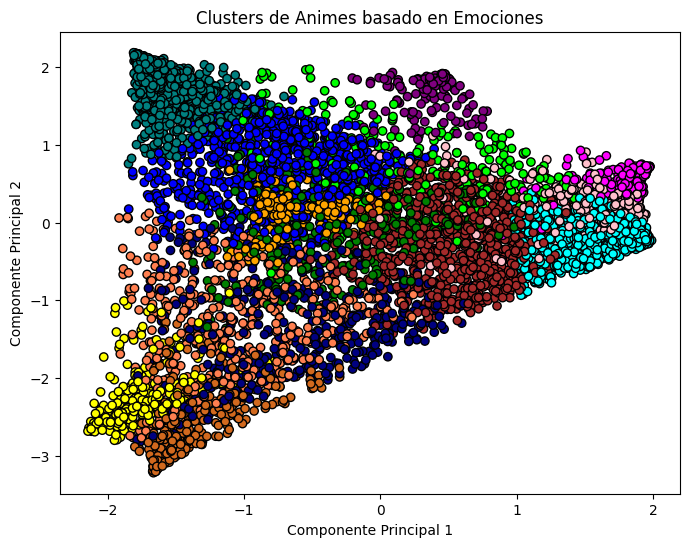

In [ ]:
# Graficación de los cluster
colores_personalizados = ["Aqua", "teal", "green", "yellow", "orange", "purple", "Chocolate", "magenta", "brown", "pink", "lime", "navy", "Blue", "Coral"]
clusters = anime_with_emotions_and_name["Cluster"]

# Usamos nuestros colores personalizados
colores = [colores_personalizados[cluster] for cluster in clusters]
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colores, edgecolors="k")
plt.title("Clusters de Animes basado en Emociones")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


In [16]:
def sortByPopularity(cluster_number):
    anime_name_popularity = anime_with_emotions_and_name[cluster_number]
    anime_name_popularity = anime_name_popularity[~anime_name_popularity['anime_id'].isin(animes_input)]
    anime_name_popularity = anime_name_popularity.drop(columns=['anime_id', 'fear', 'sadness', 'neutral', 'joy', 'anger', 'surprise', 'disgust', 'Cluster'])
    anime_name_popularity = anime_name_popularity.sort_values(by='popularity_rank', ascending=True)
    return anime_name_popularity

In [6]:
#@title Aqui comienza el modelo basado en Usuario
#Extraccion de datos
user_anime = pd.read_csv('./drive/MyDrive/SIC/anime_users.csv')
user_anime.columns = ["user_name", "anime_id_list"]

In [9]:
#@title Obtener promedio de las emociones por usuarios

animes_input = []
users = user_anime.user_name[:50]
anime_list = user_anime.anime_id_list[:50]
for index in range(len(users)-1):
  animes_input = []
  for anime in anime_list[index]:
    filtrado = anime_with_emotions_and_name[anime_with_emotions_and_name['anime_id'] == anime][['fear', 'sadness', 'neutral', 'joy', 'anger', 'surprise', 'disgust']]
  print(users[index])
  print(anime_list[index])

yfrit99
[39533, 39551, 40834, 41025, 43814]
yfroost_14
[1, 10271, 10863, 11061, 11577, 11757, 1535, 1604, 16498, 1735, 20, 2001, 205, 20507, 223, 22319, 2251, 22535, 23755, 2418, 24439, 24833, 25777, 26, 26243, 269, 27899, 28223, 28755, 28833, 28851, 28927, 28999, 3002, 30503, 30654, 30694, 31043, 31240, 31478, 31964, 32182, 32867, 32998, 33486, 33506, 34451, 34542, 34566, 34572, 34577, 35120, 35760, 35790, 35849, 3588, 36456, 36511, 37510, 37521, 37799, 37999, 38000, 38003, 38408, 38524, 38668, 38671, 38691, 3901, 39195, 39587, 39710, 40028, 40052, 40591, 40748, 40908, 40911, 40956, 41353, 41762, 42203, 5114, 6702, 813, 9253, 9919]
yfsc
[1, 10110, 10163, 10165, 10397, 10456, 1067, 10719, 11227, 114, 11597, 11843, 11887, 1195, 1210, 12189, 1219, 12679, 1292, 13367, 13759, 14227, 147, 14765, 1566, 1568, 1575, 1689, 1691, 18245, 1956, 2001, 202, 2025, 2026, 205, 2104, 2112, 2163, 223, 225, 2251, 227, 22729, 24, 240, 241, 245, 2476, 2494, 2508, 257, 2581, 2593, 2605, 2759, 2904, 2924, 294

In [17]:
df = anime_with_emotions_and_name

Nombres = pd.DataFrame()
animes_input = []
print("Escribe los nombres de los animes que ya has visto uno por uno. Escribe 'fin' cuando termines:")

while True:
    nombre = input("Ingresa un nombre de anime, (Escribe 'fin' cuando termines): ")
    if nombre.lower() == 'fin':
        break

    # Filtrar las filas correspondientes al nombre ingresado
    filtrado = anime_with_emotions_and_name[anime_with_emotions_and_name['title'] == nombre.strip()][['fear', 'sadness', 'neutral', 'joy', 'anger', 'surprise', 'disgust']]

    # Verificar si se encontraron filas correspondientes
    if filtrado.empty :
      print("No se encontró el anime")
    else:
      Nombres = pd.concat([Nombres, filtrado], ignore_index=True)
      # Añadir al DataFrame de resultados
      print("Nombre encontrado agregado a tus animes")




if Nombres.empty:
  print("No se encontraron animes en tu lista")
else:
  # Calcular los valores promedio de las columnas de emociones
  columnas_emociones = ['fear', 'sadness', 'neutral', 'joy', 'anger', 'surprise', 'disgust']
  promedios = Nombres[columnas_emociones].mean()

  # Crear un nuevo DataFrame
  X = pd.DataFrame([promedios], columns=columnas_emociones)
  print("Nuevo DataFrame con los promedios:")
  print(X)
  X_array = X.values
  result = kmeans.predict(X_array)

  print(sortByPopularity(anime_with_emotions_and_name['Cluster'] == result[0]))

  #anime_with_emotions[anime_with_emotions_and_name['Cluster'] == result[0]].to_csv("un_nombre.csv",index = False)


Escribe los nombres de los animes que ya has visto uno por uno. Escribe 'fin' cuando termines:
Ingresa un nombre de anime, (Escribe 'fin' cuando termines): Death Note
Nombre encontrado agregado a tus animes
Ingresa un nombre de anime, (Escribe 'fin' cuando termines): fin
Nuevo DataFrame con los promedios:
       fear   sadness   neutral       joy     anger  surprise   disgust
0  0.085855  0.015855  0.034499  0.002459  0.053454  0.001762  0.806115
                            title  popularity_rank
4                Sword Art Online                5
54                    Psycho-Pass               55
64                     Elfen Lied               65
74                        Clannad               75
90    Sakura-sou no Pet na Kanojo               91
...                           ...              ...
7500      Crocotires Traction AAA            13705
7502    Chinzei Hachirou Tametomo            13727
7528                     Kamakura            14042
7551                   The Closet      